### Homework Assignment #4

#### Question 1: Convolution Theorem

**a. Convolution in Fourier Space**: Prove that the Fourier transform of the convolution of two functions $f$ and $g$, denoted as $\mathcal{F}(f \star g)$, equals the pointwise product of their Fourier transforms:  
$$
\mathcal{F}(f \star g) = \mathcal{F}(f) \cdot \mathcal{F}(g).
$$  
Specify whether your proof is for continuous functions or discrete signals and clearly state any assumptions made.

---

#### Question 2: Properties of Convolution

**a. Commutativity**: Prove that the convolution operation is commutative:  
$$
f \star g = g \star f.
$$

**b. Distributivity**: Prove the distributive property of convolution:  
$$
f \star (\alpha g + \beta h) = \alpha (f \star g) + \beta (f \star h),
$$  
where $ \alpha, \beta \in \mathbb{R} $.

**c. Shift Equivariance**: Prove that convolution is shift-invariant:  
$$
f(x) \star g(x - d) = (f \star g)(x - d).
$$

**d. Scaling Property**: Prove that if a function $ f(x) $ is scaled in its argument by a factor $ a > 0 $, then its convolution with a function $ g(x) $ satisfies:  
$$
f(ax) \star g(ax) = \frac{1}{a} \big(f \star g\big)(ax).
$$
Clearly state any assumptions and steps in your proof.

---

#### Question 3: Derivative and Inverse of Convolution

**a. Derivative of Convolution**: Derive the expression for the derivative of the convolution $ f(x) \star g(x) $:  
$$
\frac{d}{dx} \big(f(x) \star g(x)\big).
$$  
Verify this property for specific functions of your choice, such as $ f(x) = e^{-x^2} $ and $ g(x) = \sin(x) $.

**b. Inverse of Convolution**: Discuss the conditions under which the convolution $ f(x) \star g(x) $ can be inverted. Derive the theoretical framework for deconvolution or solving for $ f(x) $ or $ g(x) $ given their convolution.

---

#### Question 4 (Optional, Coding): Practical Verification of Convolution Properties

**a. Implementation**: Implement the convolution operation using Python (e.g., PyTorch or NumPy) and verify the properties discussed in Question 2 for specific example functions $ f(x) $ and $ g(x) $.  

**b. Fourier Transform Connection**: Use the Fourier transform to verify the convolution theorem numerically. Show that $ \mathcal{F}(f \star g) = \mathcal{F}(f) \cdot \mathcal{F}(g) $ for your chosen functions $ f(x) $ and $ g(x) $.

**c. Applications**: Briefly explain how these properties are utilized in convolutional neural networks (CNNs).

# Question 1
### Fourier transform of convolution

$
\displaystyle
\mathcal{F}((f * g)(x)) = \int_{-\infty}^\infty (f * g)(x) \cdot e^{-2\pi i ux}\, dx = \int_{-\infty}^\infty (\int_{-\infty}^\infty f(\tau)g(x - \tau) \, d\tau) \cdot e^{-2\pi i ux}\, dx = \\
\int_{-\infty}^\infty f(\tau) (\int_{-\infty}^\infty g(x - \tau)e^{-2\pi i ux}\, dx) \, d\tau =
\begin{array}{|l|}
\tilde{x} = x - \tau \\
d\tilde{x} = dx \\
\end{array} = \int_{-\infty}^\infty f(\tau) (\int_{-\infty}^\infty g(\tilde{x})e^{-2\pi i u (\tilde{x} + \tau)}\, d\tilde{x}) \, d\tau = \\
\int_{-\infty}^\infty f(\tau)e^{-2\pi i u \tau} (\int_{-\infty}^\infty g(\tilde{x})e^{-2\pi i u \tilde{x}}\, d\tilde{x}) \, d\tau = \mathcal{F}(f) \cdot \mathcal{F}(g)
$

# Question 2
### commutativity
$
\displaystyle
(f * g)(t) = \int_{-\infty}^\infty f(\tau) g(t - \tau) \, d\tau = \begin{array}{|rl|}
\tilde{\tau} = t - \tau \\
d\tilde{\tau} = -d\tau \\
\end{array} = -\int_{\infty}^{-\infty} g(\tilde{\tau}) f(t - \tilde{\tau}) \, d\tilde{\tau} = \int_{-\infty}^{\infty} g(\tilde{\tau}) f(t - \tilde{\tau}) \, d\tilde{\tau} = (g * f)(t) 
$

### distributivity
$
\displaystyle
(f * (\alpha g + \beta h))(t) = \int_{-\infty}^\infty f(\tau) \cdot (\alpha g + \beta h)(t - \tau) \, d\tau = 
\int_{-\infty}^\infty \alpha f(\tau)g(t - \tau) + \beta f(\tau)h(t - \tau) \, d\tau = \\
\alpha\int_{-\infty}^\infty f(\tau)g(t - \tau) \, d\tau + \beta \int_{-\infty}^\infty f(\tau)h(t - \tau) \, d\tau = 
\alpha (f * g)(t) + \beta (f * h)(t)
$

### Shift Equivariance
#### proof by definition: 
$
\displaystyle
f(x) * g(x - d) = \int_{-\infty}^\infty f(a\tau)g((x - d) - \tau) \, d\tau \\
(f * g)(x - d) = \int_{-\infty}^\infty f(a\tau)g(x - d - \tau) \, d\tau 
$

therefore:

$
f(x) * g(x - d) = (f * g)(x - d)
$

### scaling property
$
\displaystyle
f(ax) * g(ax) = \int_{-\infty}^\infty f(a\tau)g(a(x-\tau)) \, d\tau = \int_{-\infty}^\infty f(a\tau)g(ax-a\tau) \, d\tau = \begin{array}{|c|}
\tilde{\tau} = a\tau \\
d\tilde{\tau} = ad\tau \Rightarrow \displaystyle\frac{d\tilde{\tau}}{a} = d\tau \\
\end{array} = \int_{-\infty}^\infty f(\tilde{\tau})g(ax-\tilde{\tau}) \, \displaystyle\frac{d\tilde{\tau}}{a} =\\
\frac{1}{a}\int_{-\infty}^\infty f(\tilde{\tau})g(ax-\tilde{\tau}) \, d\tilde{\tau} = (f * g)(ax)
$

# Question 3

$
\displaystyle
\frac{d}{dx} \big(f(x) * g(x)\big) = \frac{d}{dx} \int_{-\infty}^\infty f(\tau)g(x - \tau) \, d\tau
$\
Because we integrate over $d\tau$ and not $x$ we can apply the Leibniz integral rule to move the derivation into the integral. \
However, as this integral is indeterminate we have to assume that $g(x)$ and $g'(x)$ converges uniformly as $x \to \pm \infty$ \
Now lets continue.

$
\displaystyle
\frac{d}{dx} \int_{-\infty}^\infty f(\tau)g(x - \tau) \, d\tau = \int_{-\infty}^\infty f(\tau) \cdot \frac{\partial}{\partial x}g(x - \tau) \, d\tau = \int_{-\infty}^\infty f(\tau) \cdot g'(x - \tau) \, d\tau = (f * g')(x)
$

same for:\
$
\displaystyle
\frac{d}{dx} \big(g(x) * f(x)) = \int_{-\infty}^\infty g(\tau) \cdot \frac{\partial}{\partial x}f(x - \tau) \, d\tau = \int_{-\infty}^\infty g(\tau) \cdot f'(x - \tau) \, d\tau = (g * f')(x)
$

as we have already proven the commutativity property, we can say that:\
$
\displaystyle
\frac{d}{dx} \big(g(x) * f(x)) = \frac{d}{dx} \big(f(x) * g(x)\big)  \Rightarrow (f * g')(x) = (f' * g)(x)
$

### inverse of convolution:
lets assume we have the following convolution:\
$
h(x) = (f * g)
$\
now, we clearly know h and one of the functions (either $f$ or $g$, but because convolution is commutative it doesn't matter which one) and we want to calculate the other one.\
lets assume we want to find $f$.\
for that we assume that we can take the Fourier Transform of each function. \
$
\displaystyle
\mathcal{F}(h) = \mathcal{F}(f) \cdot \mathcal{F}(g) \Rightarrow \mathcal{F}(f) = \frac{\mathcal{F}(g)}{\mathcal{F}(h)} 
$\
and as such, $f$ is given to use by:\
$
\displaystyle
f = \mathcal{F^{-1}}(\mathcal{F}(f)) = \mathcal{F^{-1}}(\frac{\mathcal{F}(g)}{\mathcal{F}(h)})
$

So, under which condition is this inverse possible?
- f and g must be continues and absolutely integrable over the plane
meaning: \
$
\displaystyle
\int_{-\infty}^\infty |f(x)| dx < \infty
$

### example
$f(x) = e^{-x^2}$ \
$g(x) = \sin(x)$ \
$g'(x) = \cos(x)$

lets first compute the derivative of convolution: \
$
\displaystyle
\frac{d}{dx} \big(f(x) * g(x)\big) = \frac{d}{dx} \int_{-\infty}^\infty e^{-\tau^2}sin(x - \tau) \, d\tau = \int_{-\infty}^\infty e^{-\tau^2} \frac{\partial}{\partial x} sin(x - \tau) \, d\tau = 
\int_{-\infty}^\infty e^{-\tau^2} cos(x - \tau) \, d\tau
$

lets now go from the other direction: \
$
\displaystyle
\big(f(x) * g'(x)\big) = \int_{-\infty}^\infty e^{-\tau^2} \cdot cos(x - \tau) \, d\tau
$

we have gotten the same integral and so it is verified.

# Question 4

In [2]:
# constants, functions and imports
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-100, 100, 10000)
f = np.exp(-x**2)
g = np.sin(x)
h = np.cos(x)

dx = x[1] - x[0]
alpha, beta = np.random.uniform(1, 5), np.random.uniform(1, 5)
shift = np.random.uniform(1, 5)
scale = np.random.uniform(1, 10)

def difference(convolution1, convolution2):
    return np.abs(convolution1 - convolution2).sum()

In [3]:
# commutativity
convolution_f_g = np.convolve(f, g, mode='same') * dx
convolution_g_f = np.convolve(g, f, mode='same') * dx
print("the difference between those two is: ", difference(convolution_f_g, convolution_g_f), "are they close?", "yes" if np.allclose(convolution_f_g, convolution_g_f) else "no")

the difference between those two is:  1.0938442933842569e-12 are they close? yes


In [4]:
# distributivity
conv_f_alpha_g_beta_h = np.convolve(f, alpha * g + beta * h, mode='same') * dx
convolution_f_h = np.convolve(f, h, mode='same') * dx
conv_alpha_fg_beta_fh = alpha * convolution_f_g + beta * convolution_f_h 

print("the difference between those two is: ", difference(conv_f_alpha_g_beta_h, conv_alpha_fg_beta_fh), "are they close?", "yes" if np.allclose(conv_f_alpha_g_beta_h, conv_alpha_fg_beta_fh) else "no")

the difference between those two is:  4.583898202421138e-12 are they close? yes


In [8]:
g_shifted = np.sin(x - shift)

conv_shifted = np.convolve(f, g_shifted, mode='same') * dx
conv_shifted_check = np.roll(convolution_f_g, int(shift))
shift_variance_check = np.allclose(conv_shifted, conv_shifted_check)
print(f"Shift variance holds: {difference(conv_shifted, conv_shifted_check)} {shift_variance_check}")
print(f"Shift variance holds: {conv_shifted}")
print(f"Shift variance holds: {conv_shifted_check}")


Shift variance holds: 16608.405983486482 False


In [ ]:
f_scaled = np.exp(-(x * scale)**2)
g_scaled = np.sin(x * scale)


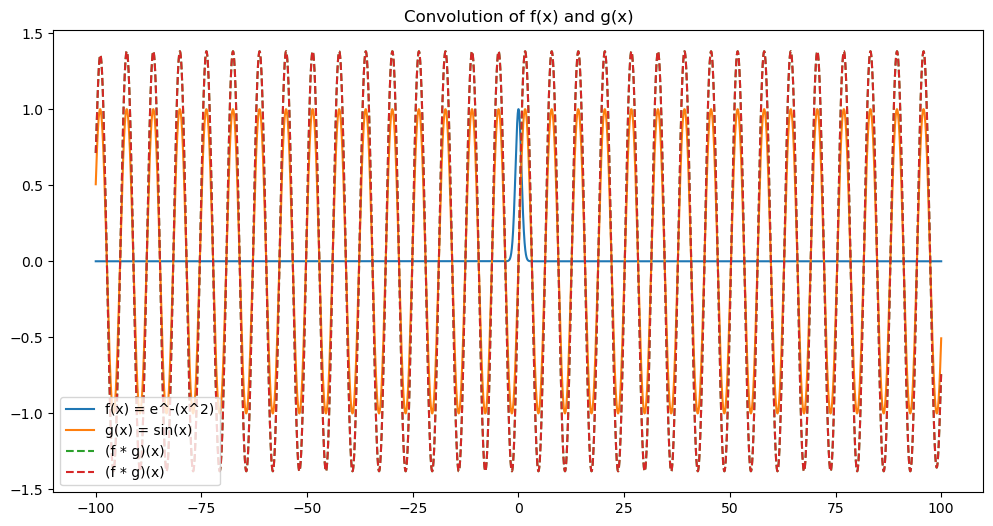

In [ ]:

# Plot f(x), g(x), and their convolution
plt.figure(figsize=(12, 6))
plt.plot(x, f, label="f(x) = e^-(x^2)")
plt.plot(x, g, label="g(x) = sin(x)")
plt.plot(x, convolution_f_g, label="(f * g)(x)", linestyle="--")
plt.plot(x, convolution_g_f, label="(f * g)(x)", linestyle="--")
plt.legend()
plt.title("Convolution of f(x) and g(x)")
plt.show()


In [ ]:
np.roll([1, 2, 3], 5)

array([2, 3, 1])